In [1]:
from scipy.misc import imresize
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import h5py
import os.path
import sys
%matplotlib inline

In [2]:
def jpg_resize_numpy(path):
    imgnp = mpimg.imread(path)
    height,_,_ = imgnp.shape
    if height != 450:
        imgnp = imresize(imgnp,(450,600,3))
    return imgnp

path = r'/Users/carsonlam/Desktop/VMC/'

In [ ]:
import time

hdf5file = 'cycle4.h5'

with h5py.File(hdf5file, 'a') as FOB:
    done = int(FOB.attrs.__getitem__('count'))
    imagenames = np.array(FOB.get('imgnames'))
    
totalnum = imagenames.shape[0]

for imgcount in range(done,totalnum):
    with h5py.File(hdf5file, 'a') as FOB:
        fail_delay = int(FOB.attrs.__getitem__('fail_delay'))
        i = imgcount + fail_delay
        try:
            arrnum = str(int(np.floor(i/1000)))
            FOB.get('imgarray'+arrnum)[i%1000]=jpg_resize_numpy(path+imagenames[i])
            FOB.attrs.__setitem__('count',i + 1)
            print(time.ctime(),'image number ',imgcount,'placed in ',i,'skipped ',fail_delay)
        except:
            print( i , 'failed, iterating fail_protocol' )
            Fail = True
            while Fail == True:
                try:
                    fail_delay += 1
                    i = imgcount + fail_delay
                    arrnum = str(int(np.floor(i/1000)))
                    FOB.get('imgarray'+arrnum)[i%1000]=jpg_resize_numpy(path+imagenames[i])
                    FOB.attrs.__setitem__('count',i + 1)
                    print(time.ctime(),"fail everted skipped ahead to", imgcount + fail_delay ,arrnum, i%1000,'new count',i + 1,imagenames[i])
                    FOB.attrs.__setitem__('fail_delay', fail_delay)
                    Fail = False
                except:
                    print('try again')
                    pass 
            pass
                    
            

#623 to 639 all failed

('Thu Mar 31 15:17:48 2016', 605, '0', 605, 'new count', 606, '6690_LE.jpg')
('Thu Mar 31 15:18:23 2016', 606, '0', 606, 'new count', 607, '6690_RE.jpg')
('Thu Mar 31 15:18:58 2016', 607, '0', 607, 'new count', 608, '8438_LE.jpg')
(608, 'failed, iterating fail_protocol')
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try again
try agai

In [3]:
import h5py
import numpy as np

with h5py.File('cycle4.h5', 'a') as FOB:
    #print(FOB.keys())
    #FOB.attrs.__setitem__('count',605)
    #FOB.attrs.__setitem__('fail_delay',0)
    #imagenames = np.array(FOB.get('imgnames'))
    print(FOB.attrs.__getitem__('count'))
    print(int(FOB.attrs.__getitem__('fail_delay')))
        #imgnames = np.array(FOB.get('imgnames')) 
        #FOB.get('imgarray'+arrnum)[i%1000]=jpg_resize_numpy(path+imagenames[i])
    #print(type(FOB.get('imgarray1')[671]))

1301
96


<type 'numpy.ndarray'>
(960, 1280, 3)
<type 'numpy.ndarray'>
(450, 600, 3)


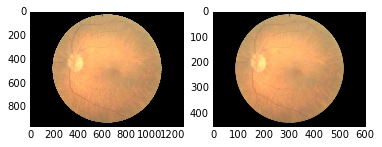

In [15]:
img1 = mpimg.imread(path+imgnames[623])
fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img1)
print(type(img1))
print img1.shape

a=fig.add_subplot(1,2,2)
img2 = jpg_resize_numpy(path+imgnames[623])
imgplot = plt.imshow(img2)
print(type(img2))
print img2.shape
#print(type(imgnames),imgnames.shape)
# for i = 197 image 16297_LE.jpgthe size is 534x400, even smaller than 600, 450 , the resize function does not expand the shape.

(400, 534, 3)
<class 'matplotlib.image.AxesImage'>
(450, 600, 3)


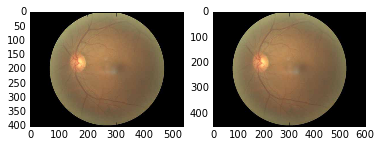

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig = plt.figure()
a=fig.add_subplot(1,2,1)

shape1 = mpimg.imread(path+imgnames[197])
imgplot = plt.imshow(shape1)
type(imgplot)
print shape1.shape

a=fig.add_subplot(1,2,2)
shape2 = jpg_resize_numpy(path+imgnames[197])
imgplot = plt.imshow(shape2)
print(type(imgplot))
print shape2.shape